<a href="https://www.kaggle.com/code/danielzaslavsky/data-plotting-modeling-and-explainability?scriptVersionId=162224319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Explanation

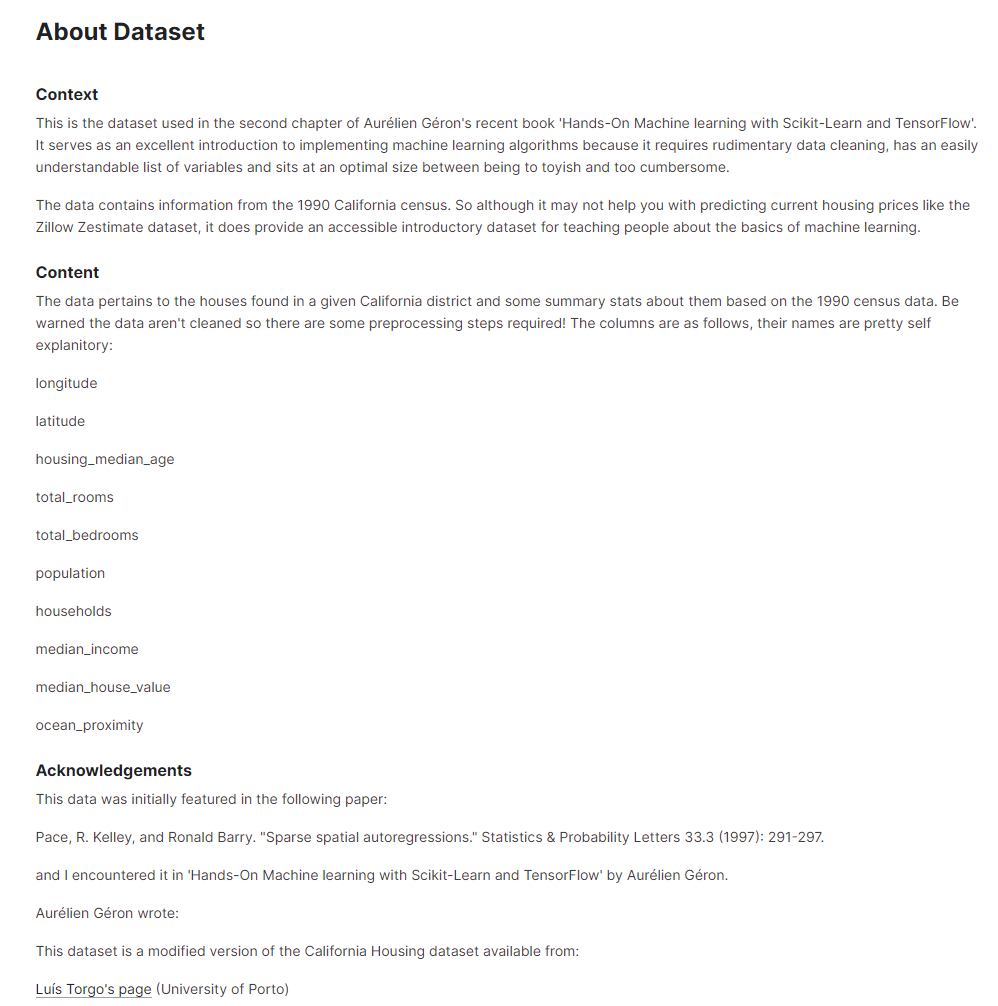


# Imports

In [1]:
import pandas as pd
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
import shap

# is shap is not istalled - run !pip install shap


# Data Loading

In [2]:
df=pd.read_csv('/kaggle/input/housing-bgu/housing.csv')

# EDA

## Checking missing values

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Histograms

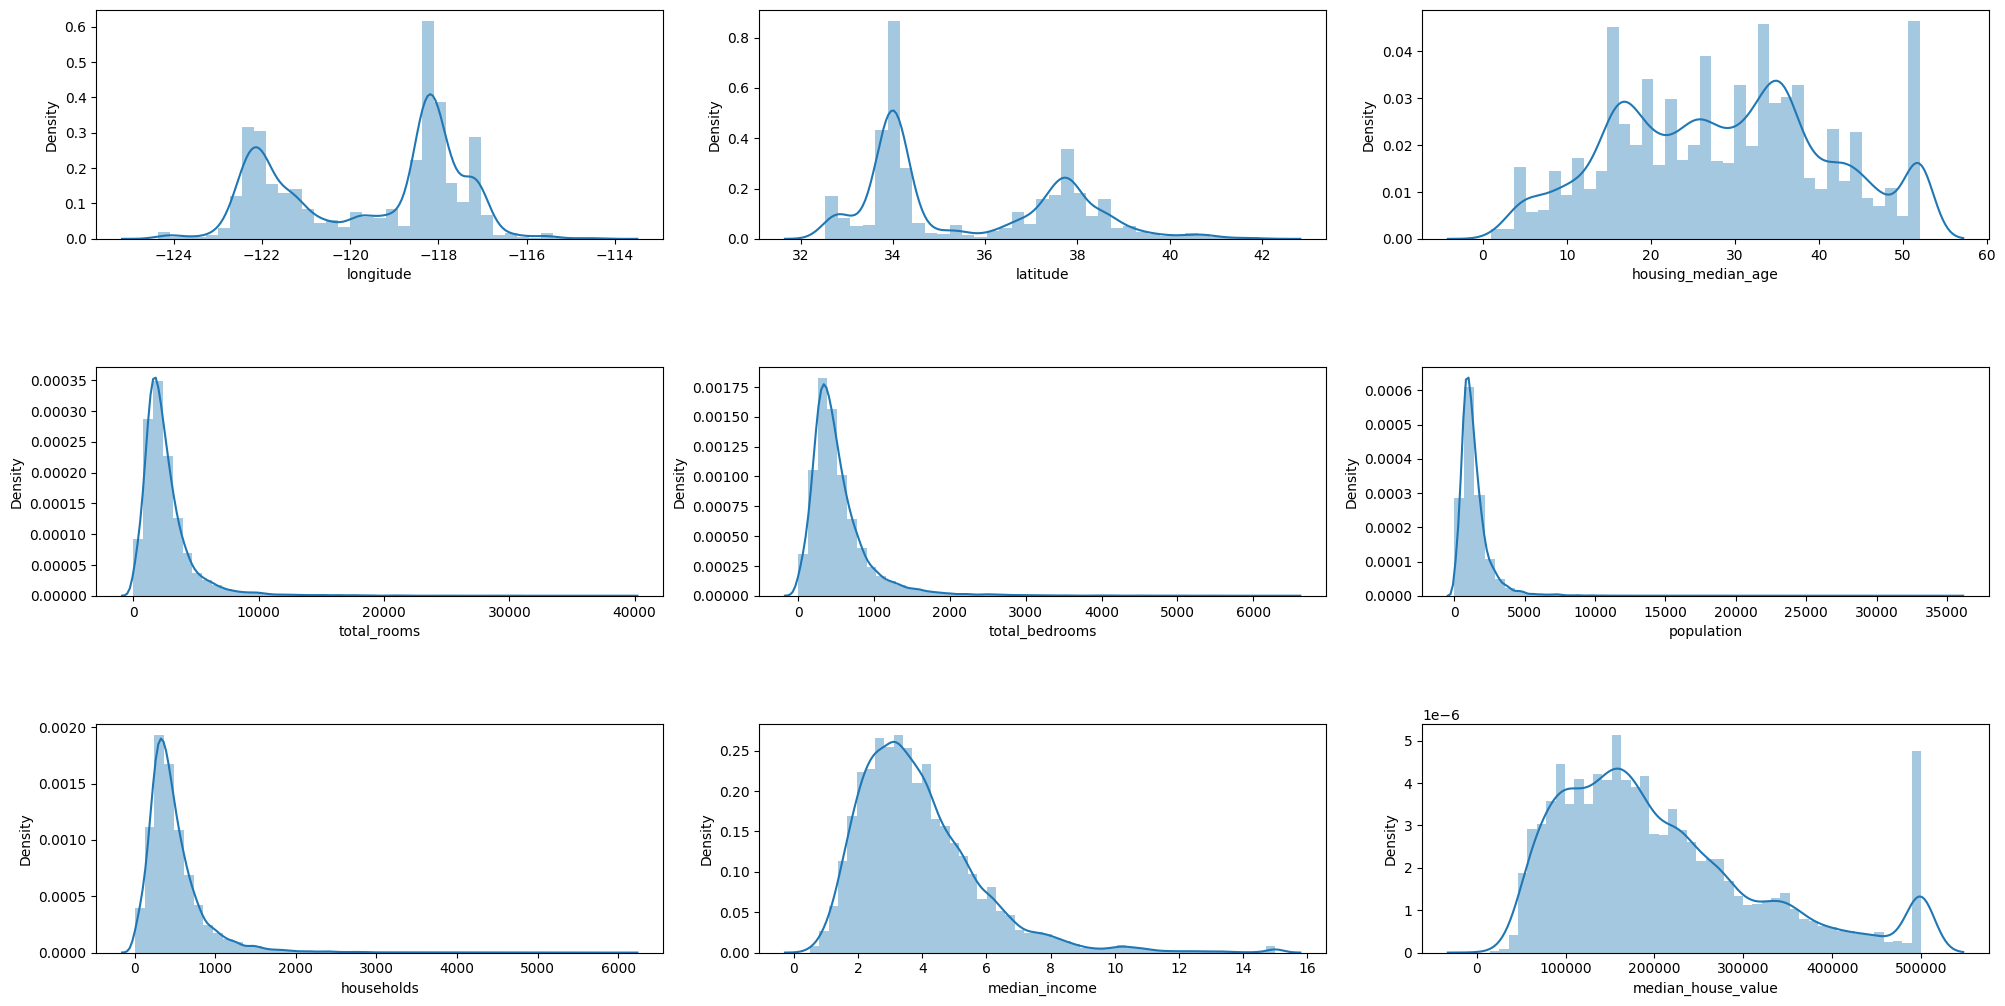

In [5]:
# create dist plot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.select_dtypes(include=np.number).items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Boxplots 

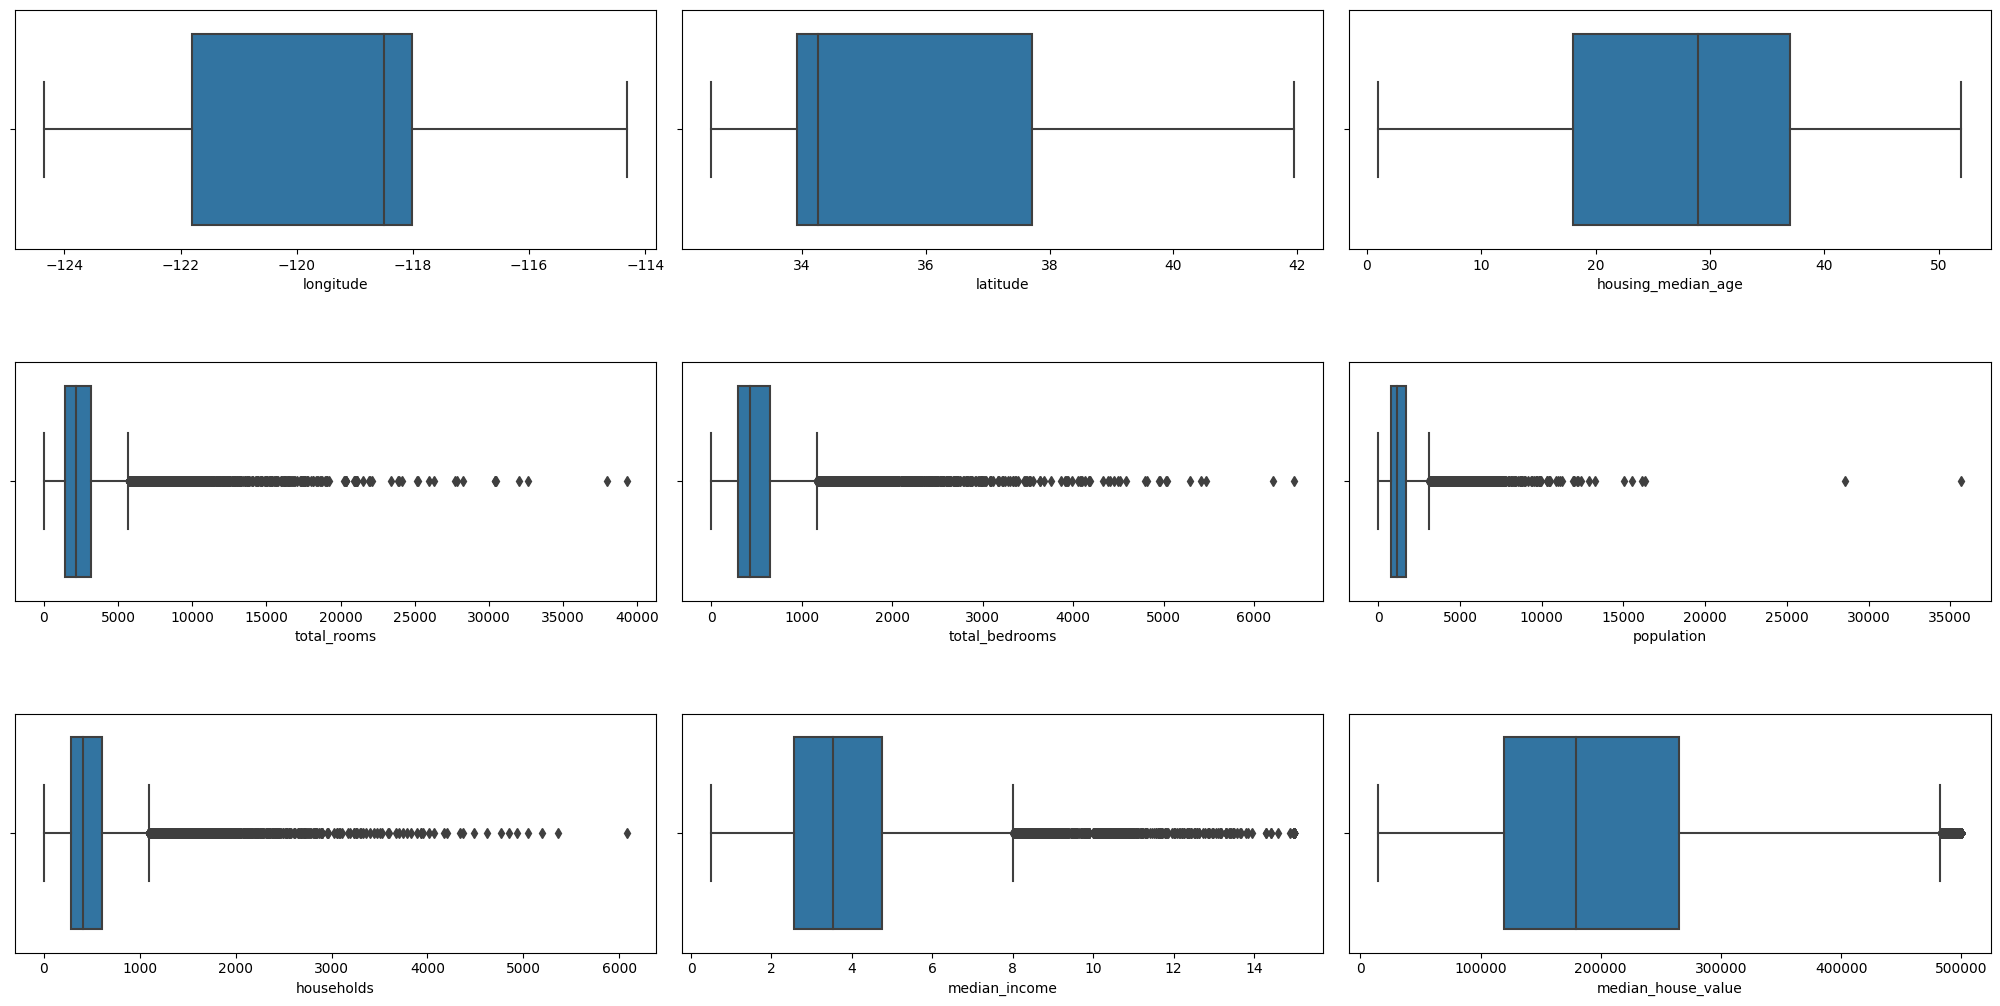

In [6]:
# create dist plot
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
ax = ax.flatten()
for col, value in df.select_dtypes(include=np.number).items():
    sns.boxplot(x=col,data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## OHE

In [8]:
### One Hot Encoding the columns - RiverBound, NewRAD, TaxSlab of the dataset

encoded_dataset = pd.get_dummies(data = df, columns = ['ocean_proximity'])
encoded_dataset.columns = encoded_dataset.columns.str.replace('<', 'less')


In [9]:
encoded_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_less1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


## Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

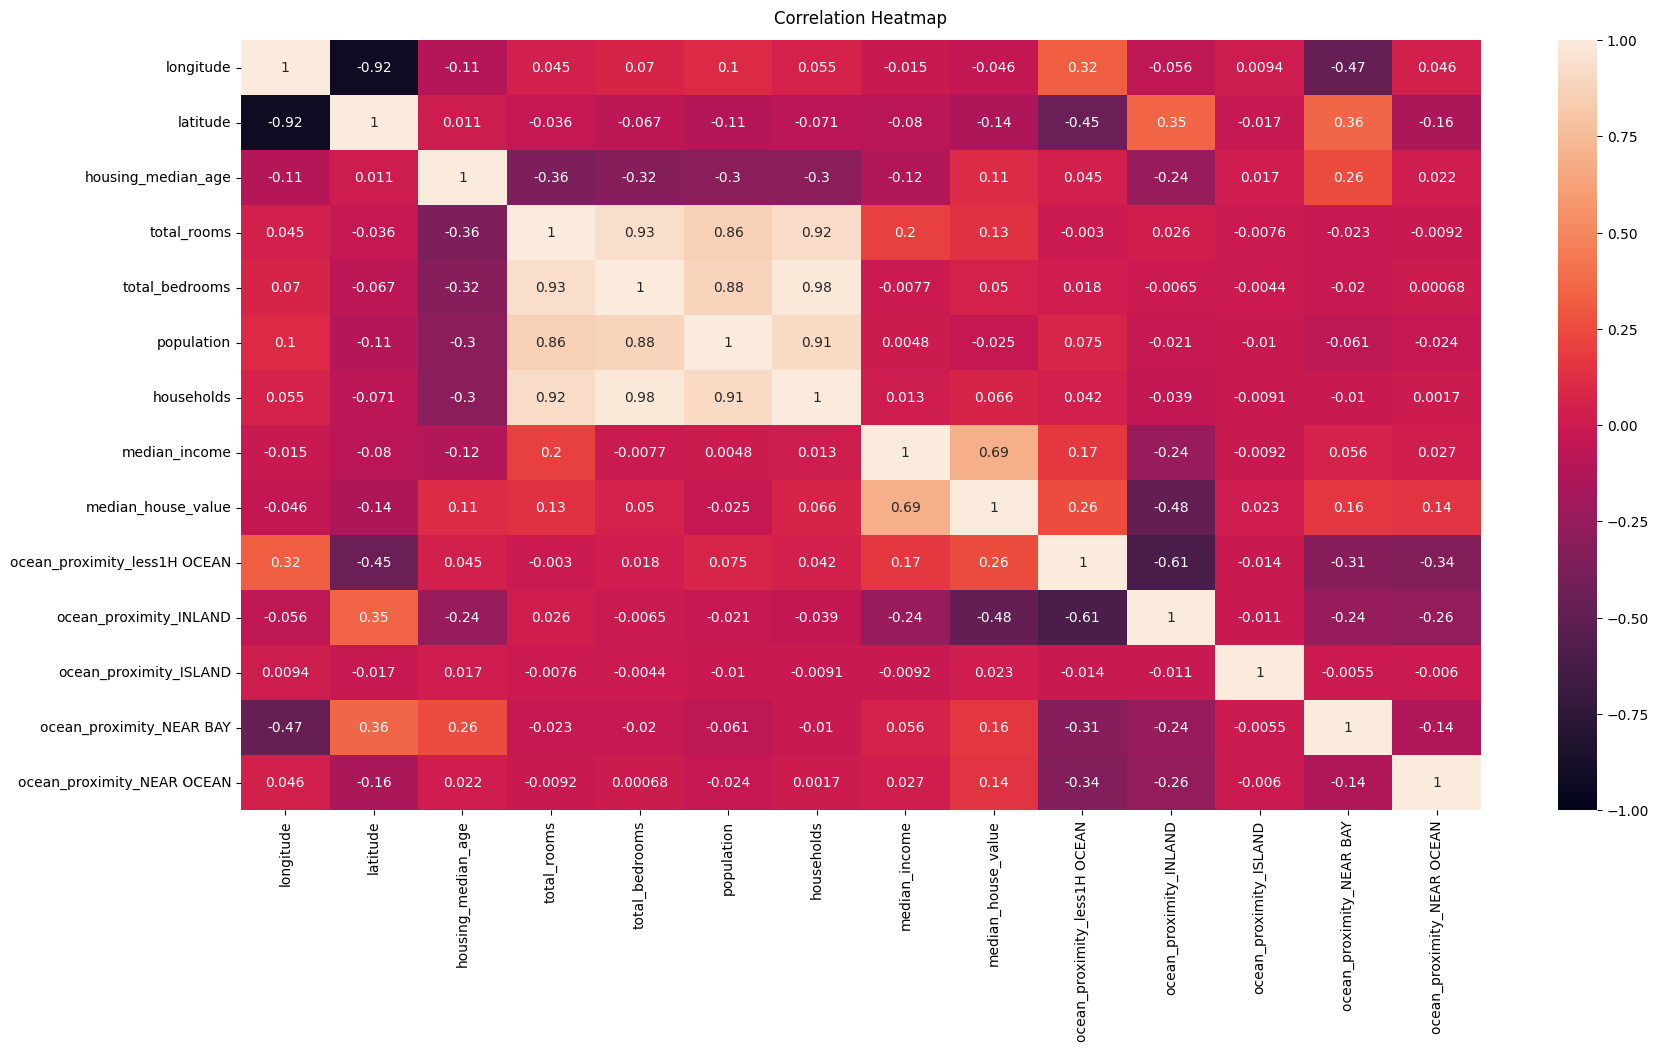

In [10]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (20, 10))
heatmap = sns.heatmap(encoded_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

# Data spliting

In [11]:
encoded_dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_less1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [12]:
X = encoded_dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_less1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
Y = encoded_dataset['median_house_value']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)


# Modeling

In [14]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_less1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1247,-122.33,39.10,10.0,266.0,62.0,154.0,49.0,2.2500,False,True,False,False,False
12700,-121.41,38.61,36.0,3099.0,605.0,1322.0,623.0,3.4784,False,True,False,False,False
16815,-122.43,37.64,42.0,4091.0,757.0,1861.0,771.0,4.2070,False,False,False,False,True
6331,-117.95,33.99,15.0,3978.0,692.0,2418.0,665.0,5.0142,True,False,False,False,False
6309,-117.99,34.04,30.0,4468.0,959.0,4027.0,938.0,3.1850,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,-118.31,34.02,45.0,1423.0,278.0,822.0,276.0,2.4519,True,False,False,False,False
14879,-117.07,32.63,37.0,2303.0,379.0,1026.0,357.0,3.4550,False,False,False,False,True
3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,True,False,False,False,False
20152,-119.26,34.46,30.0,3826.0,691.0,1656.0,657.0,4.0074,True,False,False,False,False


In [15]:
### Training the XGBoost Regression model on the Training set
xgboost_regressor = xgboost.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [16]:
### Predicting the Test set results
Y_pred = xgboost_regressor.predict(X_test)

In [17]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)
print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 48853.835


# Explainability

In [18]:
explainer = shap.TreeExplainer(xgboost_regressor)
shap_values = explainer(X)


## All prediction explainers
All explainers like the above are plotted in one graph as below.

Q1: Create A summary_plot to explaine results. 
The plot is designed to display an information-dense summary of how the top features in a dataset impact the model’s output. Each instance the given explanation is represented by a single dot on each feature row.

what are the relationships of the top 3 features 

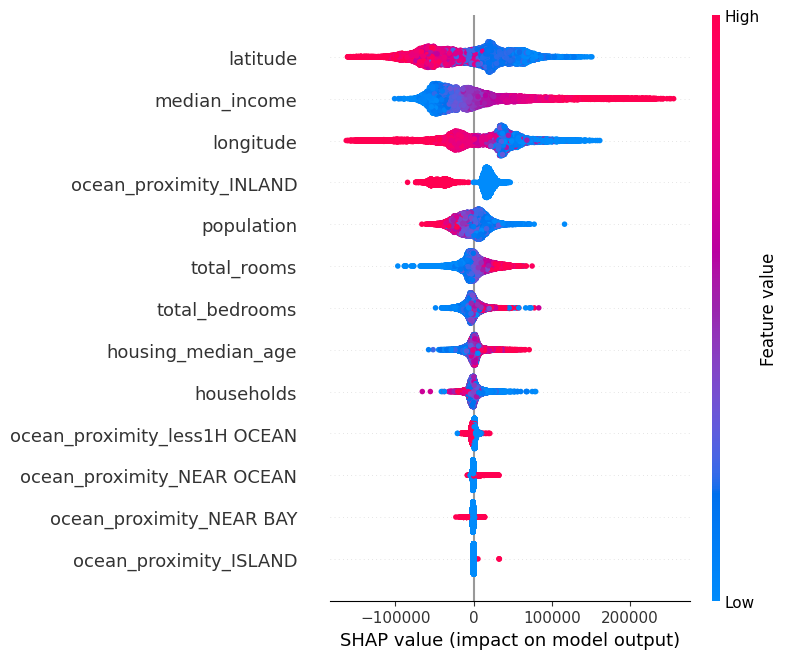

In [19]:
shap.summary_plot(shap_values, X, feature_names=X.columns)


We can see here that the top 3 features are latitude, median_income & longitude. From the graph we can first see that they generally have far
more values and a far greater **variance** then the rest of the features, and they are more volatile then the others.
IF we have a higher latitude and/or longitude, the higher our median_house_income will be.
For median income its the opposite. The lower it is, the higher the median_house_income will be.
median_income especially becomes more impactful on the more positive value.

*Enter a short description of the plot here:*

This plot will display an information-dense summary of how the top features impact the model's output.

## Variable importance
This variable importance shown as below simply aggregates the above by computing the sum of the absolute values of shap values for all data points.

Q2: Create bar summary_plot explaine results, and what can you say about the top 3 features

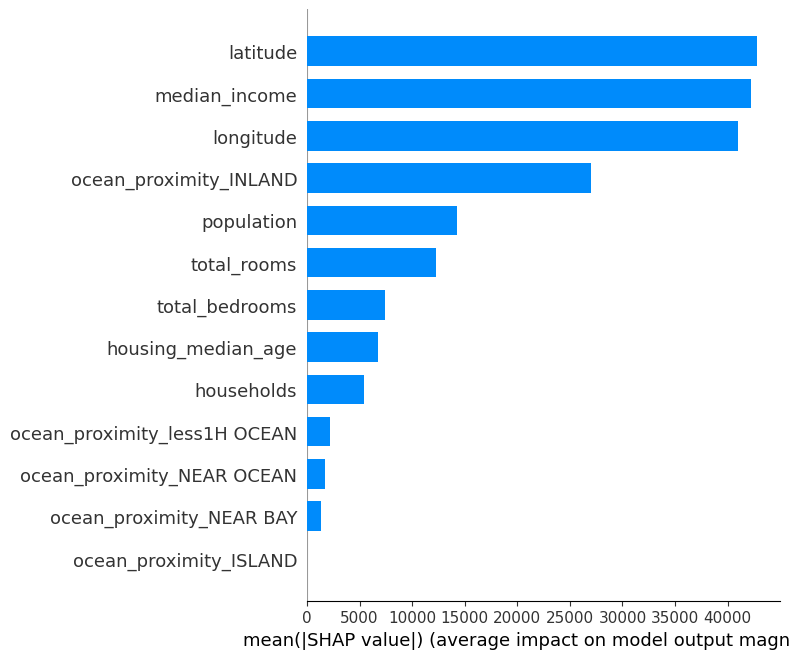

In [20]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=X.columns)

The top three features, like we have seen in the previous summary plot, are latitude, median_income and longtitude.
In this plot we can see in a far more understandable way which feature has the most impact on the model, which is why they are on the top.

**#Enter a short description of the plot here 
**

This bar plot provides a summary of the average magnitude of SHAP values for each feature.
It helps identify the top features that contribute the most to the model predictions.
The higher the bar, the more influence the corresponding feature has on the model output.

## Dependency Plot
This plot shows a certain value and its shap value as a scatter plot with the color specified by automatically selected variable, which separates most the certain value and its shap valu

Q3: Create Dependency Plot for median_income and explaine results 

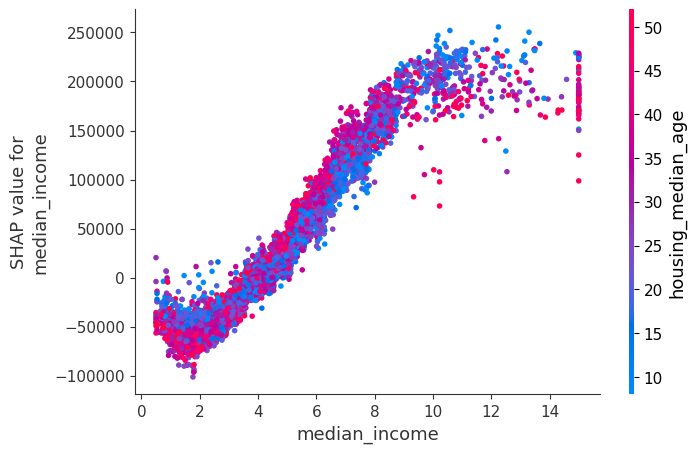

In [21]:
dep_shap_values = explainer.shap_values(X)
shap.dependence_plot("median_income", dep_shap_values, X)

Here we see the dependency between median_income on the x-axis, and the SHAP value of it on the Y-axis.
The other Y value, depending on color, shows a great density of people with high
housing-median-age, concentrating in either the lower ends of median income of central ones.

**#Enter a short description of the plot here 
**

This plot visualizes how the model output depends on the feature "median_income."
Each dot represents a data point, and the color indicates the value of another feature (housing_median_age).

## local explanation 

Q4: Create waterfall Plot fpr first data point (row) in DB and explaine results 


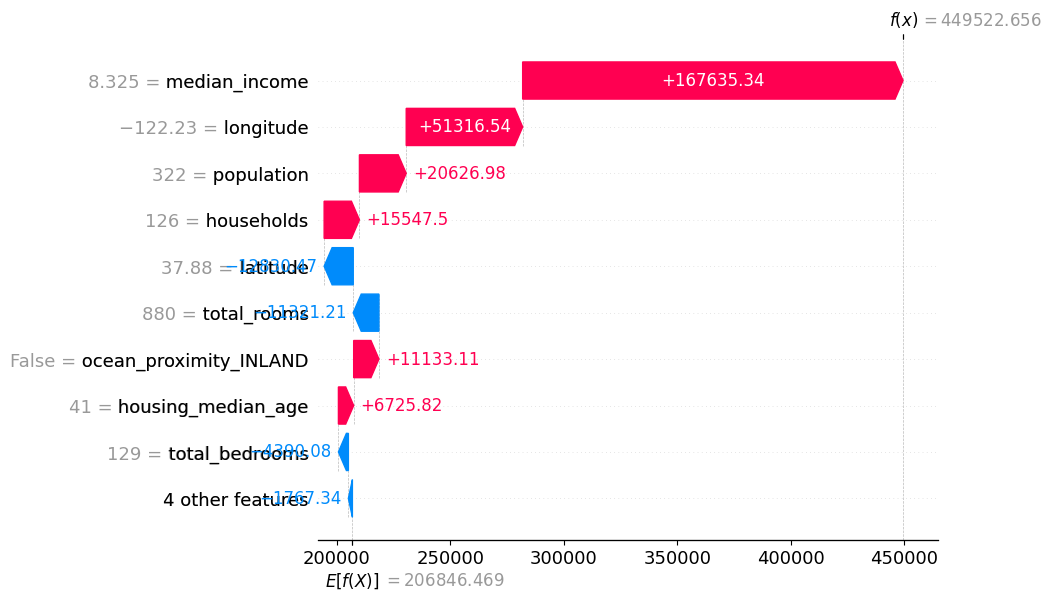

In [22]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0], feature_names=X.columns))


We can see in this graph that median_income has the highest contribution to the model prediction by a stagering amount.

**#Enter a short description of the plot here 
**

This waterfall plot illustrates the contribution of each feature to the model's prediction for the first data point.
It starts with the expected model output and shows how each feature either increases or decreases the prediction.

Q5: what could we have done during our process to imporve modeling and explainability

enter your answaer here:


1. Tune our parameters for the xgboost.
2. Use k-fold cross validation to estimate the preformance of the model better.